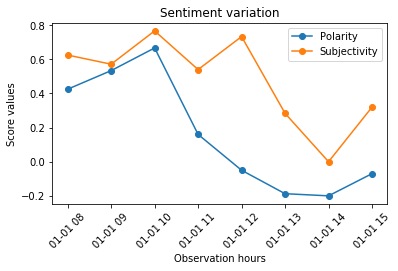

In [8]:
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# first contrive a list of short mentions in the trading journal
# this is common among many professionals

mentions = ["The cleanest entry in transaction, the price went exactly how I predicted, nice job",
            "Incredible accuracy, the price went exactly how I hoped, is so good to be right in the market",
           "Get the perfect entry, perfectly according to set up, though low profit",
            "Entered hastily, high discomfort and fear of loosing",
           "Poor start, eventualy went so nicely in profit, not a good decision",
            "Nothing seems to work in the last couple of weeks, I'm so dumb",
           "Howgly-mowgly, this was close to destroy my account, catastrophic mistake",
           "Managed to control my emotions, though the market caused my high loses"]

# loop trough the mentions and extract polarity
# subjectivity is not of interest here, because all the mentions are just traders'opinions

sentiment_polarity = []    #list for sentiment scores
sentiment_subjectivity = []
for mention in mentions:
    sentiment_polarity.append(TextBlob(mention).sentiment.polarity)
    sentiment_subjectivity.append(TextBlob(mention).sentiment.subjectivity)
    

# Just a scenario ...
# The observation time is draw out of hours range, in reality trades doesn't occur like this
observation_dates = np.arange('2019-01-01T08:00', '2019-01-01T16:00', dtype='datetime64[h]')
#using pandas to get the list of hours
observation_dates =  list(map(pd.to_datetime, observation_dates))

#plotting the sentiment score
plt.figure()
plt.plot(observation_dates, sentiment_polarity, '-o', observation_dates, sentiment_subjectivity, '-o')

#rotate the tick labels for x axis
x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(45)

plt.subplots_adjust(bottom=0.25)

plt.xlabel('Observation hours')
plt.ylabel('Score values')
plt.title('Sentiment variation')

plt.legend(['Polarity', 'Subjectivity'])